# SugarTS example
This is a quick tutorial on how to engage with the sugarTS package.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta

import pandas as pd
import numpy as np
import plotly.graph_objects as go

from sugarTS.model import Patient

In [2]:
# create a patient object
patient = Patient()

In [3]:
# fit the model to the patient's data
patient.load_example_data()
patient.fit_model()

In [4]:
# decide on meal (how many carbs? when?)
current_time = patient.ytest.index[-1]
carb_time = current_time + timedelta(minutes=30)
carbs = 40

# calculate the optimal bolus
optimal = patient.find_optimal_bolus(carbs, carb_time)
print('Current time is {}'.format(current_time))
print('Give yourself a bolus of ' + str(optimal['bolus amount']) +
      ' units at ' + str(optimal['bolus time']))

Current time is 2020-04-22 10:35:00
Give yourself a bolus of 5 units at 2020-04-22 10:45:00


In [5]:
# plot the model forecast for the optimal bolus
bolus = optimal['bolus amount']
bolus_t = optimal['bolus time']
x_future = patient.build_x_future(carbs, carb_time, bolus, bolus_t)
y_ind = pd.date_range(start=x_future.index[0], 
                     end=x_future.index[-1]+timedelta(minutes=5),
                     freq='5T')
ypred = pd.Series(patient.forecast(x_future), index=y_ind)

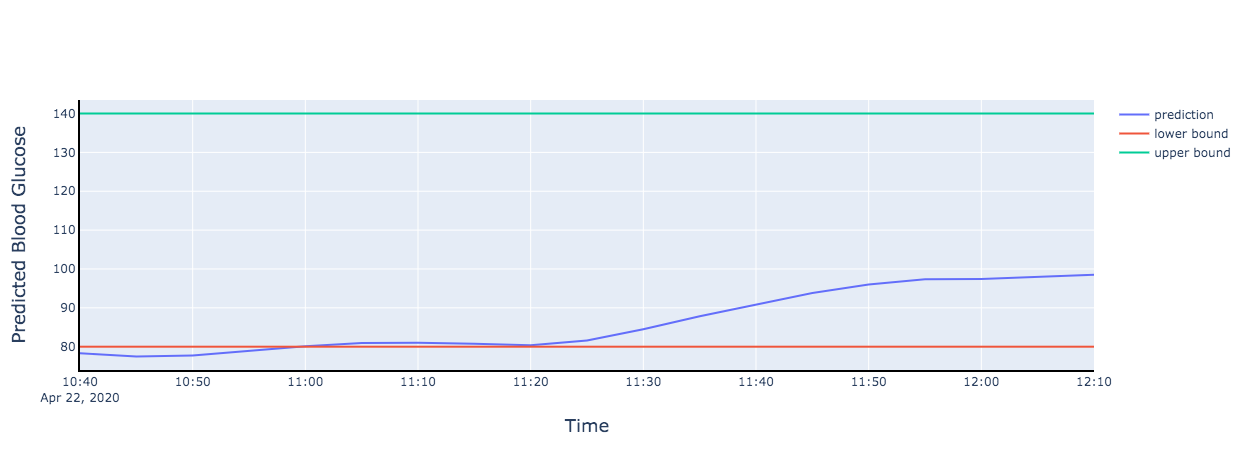

In [7]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=y_ind,
        y=ypred,
        mode='lines',
        name='prediction')
    )
fig.add_trace(
    go.Scatter(
        x=y_ind,
        y=np.ones(len(y_ind))*patient.target_range[0],
        mode='lines',
        name='lower bound')
    )
fig.add_trace(
    go.Scatter(
        x=y_ind,
        y=np.ones(len(y_ind))*patient.target_range[1],
        mode='lines',
        name='upper bound')
    )
fig.update_xaxes(
    title_text='Time',
    title_font=dict(size=18),
    showline=True, 
    linewidth=2, 
    linecolor='black')
fig.update_yaxes(
    title_text='Predicted Blood Glucose', 
    title_font=dict(size=18),
    showline=True, 
    linewidth=2, 
    linecolor='black')
fig.show()